

# Project: Investigate a Dataset (TMDB Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and    revenue and include this important attribute

- popularity
- director
- runtime
- genres
- production_companies
- vote_count
- budget_adj	
- revenue_adj

## Questions that we need to explore 
- Which genres are most popular from year to year
- What kind of properties are associted with movies that have high revenues ?
- Which Genres of movies that have high vote last 5 years
- How is revenue trending over time ?
- Average duration of movies in each genre
- Do top ratings movies always generate big revenue
- Universal Pictures Company
- Do higher budget movies always generate big revenue? 
- Can we provide a most popular director based on ratings?

In [105]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [106]:
df = pd.read_csv('tmdb-movies.csv')

In [107]:
df.shape

(10866, 21)

In [108]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [110]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [111]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [112]:
df.duplicated().sum()

1



### Data Cleaning 

After view the poperties of data set we notice that there missing and duplicated values and some and necessry cloumns in data set

1 - drop (id , imdb_id , homepage , cast , tagline , keywords , overview) becuase i don't care about them in analysis \n

2 - drop rows with null values

3 - get only the first geners ( action , comedy , etc ... )

4 - get only the first name of production company

5 - replace zeros in some columns with there mean

6 - fix data type of release_date

In [113]:
# Drop unnecessary rows 
df = df.drop(['id','imdb_id','homepage' , 'cast' , 'tagline' , 'keywords' , 'overview'] , axis = 1)


In [114]:
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [115]:
#drop rows which have null values
df = df.dropna()

In [116]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [117]:
# Drop Duplicated rows
df = df.drop_duplicates()

In [118]:
df.duplicated().sum()

0

In [119]:
# get first value in genres {Action , Comedy , etc}
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [120]:
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [121]:
# get first value in Production Company
df['production_companies'] = df['production_companies'].apply(lambda x: x.split("|")[0])
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [122]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [123]:
# Improved numbers for reading
df['revenue_adj'] = df['revenue_adj'] / 1000000
df['budget_adj'] = df['budget_adj'] / 1000000

In [124]:
# replace zeros in some rows with the mean of column
column = ['budget' , 'revenue' , 'runtime', 'budget_adj' , 'revenue_adj']

for i in column: 
    df[i] = df[i].replace(0,df[i].mean())

In [125]:
df.shape

(9806, 14)

# <a id='eda'></a>
## Exploratory Data Analysis


## Research Question 1 : Which genres are most popular from year to year
#### Answer : we found that the most popular genres from year to year is (Adventure Movies)

<AxesSubplot:title={'center':'Popularity of Genres'}, xlabel='geners', ylabel='Mean of popularity'>

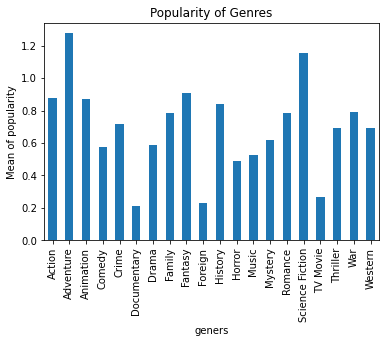

In [126]:
geners_pop = df.groupby(['genres'])['popularity'].mean()
geners_pop.plot(kind = "bar" ,xlabel = "geners" , ylabel = 'Mean of popularity',title='Popularity of Genres')

## Q2 : What kind of properties are associted with movies that have high revenues ?
#### Answer : also adventure movies have a high revenues 

<AxesSubplot:title={'center':'Revenue of each Genres'}, xlabel='Genres', ylabel='Revenue'>

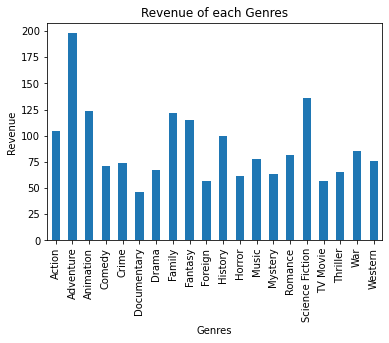

In [127]:
df.groupby(['genres'])['revenue_adj'].mean().plot(kind = 'bar' , xlabel = "Genres" , ylabel = "Revenue" , title="Revenue of each Genres")

## Q3 : Which Genres of movies that have high vote last 5 years
#### Answer : last 5 years we found that movies which kind of Documentary have a high votes 

<AxesSubplot:title={'center':'Rate of Genres'}, xlabel='Genres', ylabel='Average of rate'>

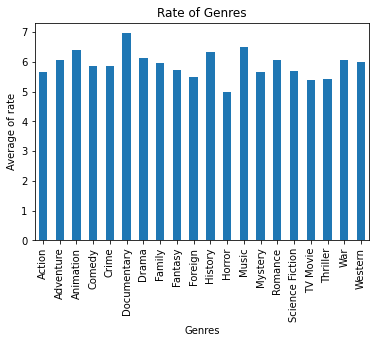

In [128]:
year = df[df['release_year'] > 2009]

year.groupby(['genres'])['vote_average'].mean().plot(kind = 'bar' , xlabel="Genres" , ylabel="Average of rate" , title = "Rate of Genres")

## َQ4 : How is revenue trending over time ? 
#### Answer : We noticed that with the progression of the years, the percentage of revenues increased at an almost constant rate. I think that the number of films increases every year, which led to an increase in profits.

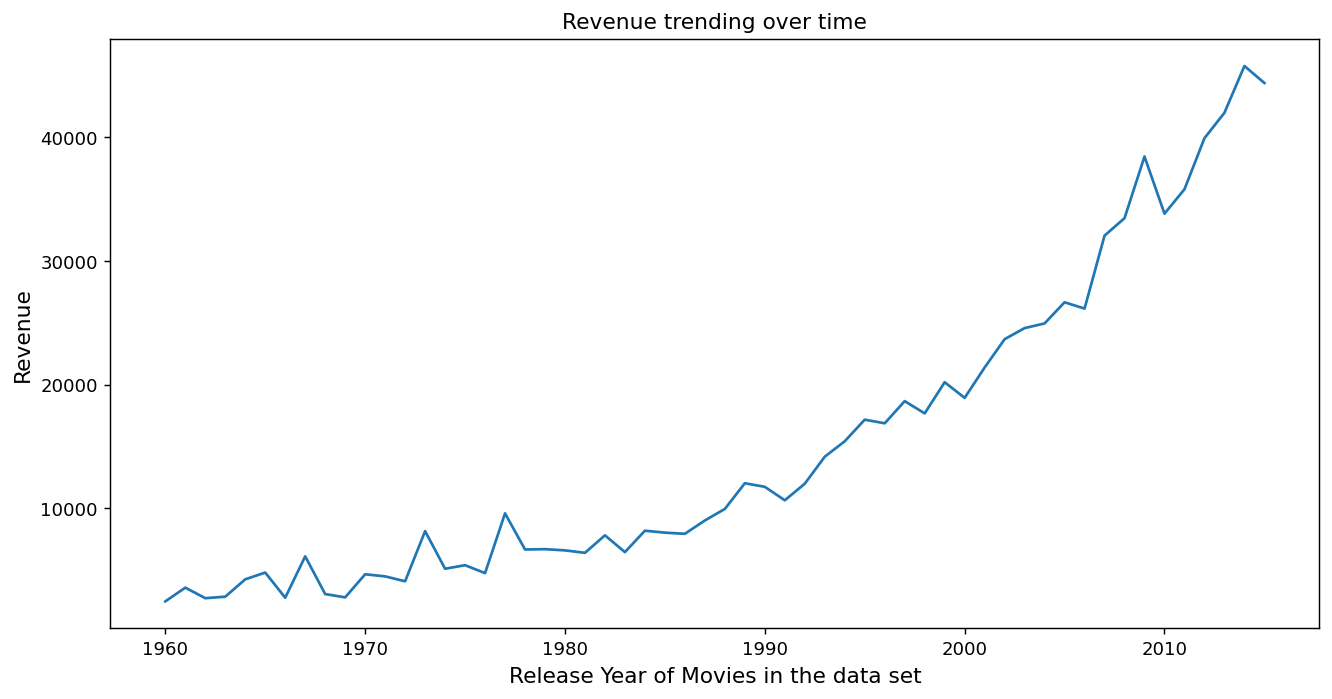

In [129]:
release = df.groupby('release_year')['revenue_adj'].sum()

plt.figure(figsize=(12,6), dpi = 130)
plt.title("Revenue trending over time")
#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Revenue', fontsize = 12)
#plotting the graph
plt.plot(release)

#displaying the line plot
plt.show()

### Q5 : ِAverage duration of movies in each genre
#### Answer : We also note that the average duration of war films is the highest among the rest, and anime films are the lowest

In [130]:
time = df.groupby(['genres'])['runtime'].mean()

<AxesSubplot:title={'center':'Average duration of movies in each genre'}, xlabel='Geners', ylabel='Mean of movies time'>

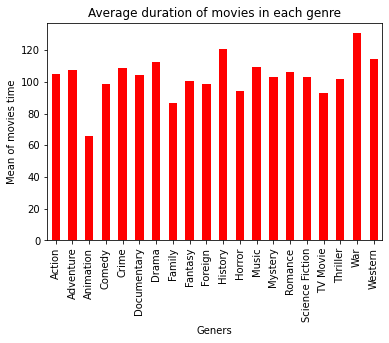

In [131]:
time.plot(kind = 'bar' , color = 'red' , xlabel = "Geners" , ylabel = "Mean of movies time" , title = "Average duration of movies in each genre")

### Q6 : Universal Pictures Company
#### Answer : We note that Universal Pictures Company is the most frequent in the data set, which aroused curiosity to know whether its frequency has anything to do with the percentage of revenues that this company achieves in its films. The answer was yes, this company. The average revenues of its films are greater than the average revenues of all other films

In [132]:
df['production_companies'].value_counts()

Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      213
                                         ... 
Mungo Productions                           1
Big Arty Productions                        1
CorazÃ³n International                      1
Premise Media Corporation                   1
Norm-Iris                                   1
Name: production_companies, Length: 3041, dtype: int64

In [133]:
universal_company = df[df['production_companies'] == 'Universal Pictures']
other_company = df[df['production_companies'] != 'Universal Pictures']

In [134]:
universal_company['revenue_adj'].mean()

132.93444548619323

In [135]:
other_company['revenue_adj'].mean()

83.85615061508045

## Do top ratings movies always generate big revenue?
#### Answer : No not always we notice that movies with high rate generate low revenue

In [136]:
def labels(x,y):
    plt.xlabel(x)
    plt.xlabel(y)
    plt.show()

In [137]:
rate = df['vote_average']
revenue = df['revenue_adj']

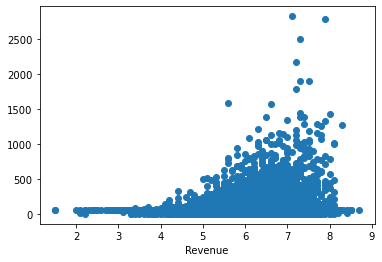

In [138]:
plt.scatter(rate,revenue )
labels("Rate","Revenue")

## Do higher budget movies always generate big revenue?
#### Answer : no not always 

In [139]:
budget = df['budget_adj']

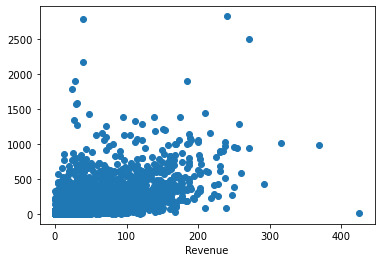

In [140]:
plt.scatter(budget,revenue)
labels("Budget","Revenue")

## Can we provide a most popular director based on ratings?
#### Answer : Woody Allen is most popular director he have total average of vote ( 272.4)

In [141]:
director = df.groupby(['director'],as_index = False).sum()

In [142]:
maximum_value = director['vote_average'].max()

In [143]:
director[director['vote_average'] == maximum_value]

,director,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
4463,Woody Allen,24.423285,5.855292e+08,1.733581e+09,4044.0,7289,272.4,83723,790.976858,2431.325964


## Summary Statisitcs 

In [144]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9806.000000,9806.000000,9.806000e+03,9806.000000
mean,0.693143,2.398067e+07,6.679552e+07,102.880550,238.622578,5.966459,2000.890271,2.877740e+01,86.158416
std,1.035525,2.909287e+07,1.160392e+08,27.884381,602.081472,0.914291,13.032372,3.158494e+01,142.631761
min,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-07,0.000002
25%,0.231581,1.612525e+07,3.540659e+07,90.000000,18.000000,5.400000,1994.000000,1.935070e+01,49.546038
50%,0.418756,1.612525e+07,4.407785e+07,100.000000,46.000000,6.000000,2005.000000,1.935070e+01,56.855278
75%,0.774231,1.900000e+07,4.407785e+07,112.000000,172.000000,6.600000,2011.000000,2.439107e+01,56.855278
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+02,2827.123750


<a id='conclusions'></a>
# Conclusions

### Finally, I want to summarize the conclusions I obtained through my analysis of the data

### Limitation 
- i found some column that is not necessary for me in analysis so i drop them
- Rows with nan values were dropped
- values which equal zero replaced with mean of column

### Summary of Analysis

- The First research question " Which genres are most popular from year to year" has showen The most popular genres is Adventure 
- The Second research quesion " What kind of properties are associted with movies that have high revenues ?" has showen that also adventure is have the most revenue
- From third research " Which Genres of movies that have high vote last 5 years " we notice that last 5 years the movies which kind of Documentary have a high votes
- in forth question "How is revenue trending over time ?" We noticed that with the progression of the years, the percentage of revenues increased at an almost constant rate. I think that the number of films increases every year, which led to an increase in profits
- We note that Universal Pictures Company is the most frequent in the data set, which aroused curiosity to know whether its frequency has anything to do with the percentage of revenues that this company achieves in its films. The answer was yes, this company. The average revenues of its films are greater than the average revenues of all other films
- we notice that movies with high rate not always generate high revenue
- in the last question "Can we provide a most popular director based on ratings?" show that [Woody Allen] is most popular director he have total average of vote ( 272.4)